In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
x, y = make_blobs(n_samples = 100, n_features =2, centers=2, random_state=0, cluster_std =.6)

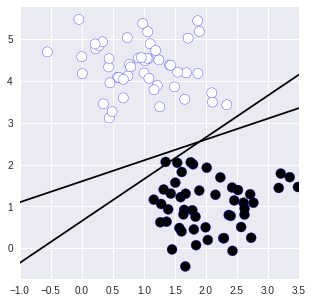

In [ ]:
#plotter
xfit = np.linspace(-1, 3.5)
plt.style.use('seaborn')
plt.figure(figsize = (5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=100, edgecolors='blue')

for m, b in [(1, .65), (.5, 1.6)]:
  plt.plot(xfit, m*xfit+b, '-k')

plt.xlim(-1, 3.5)
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C=1E10)
model.fit(x, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
SVC(C=10000000000.0, kernel='linear')

SVC(C=10000000000.0, kernel='linear')

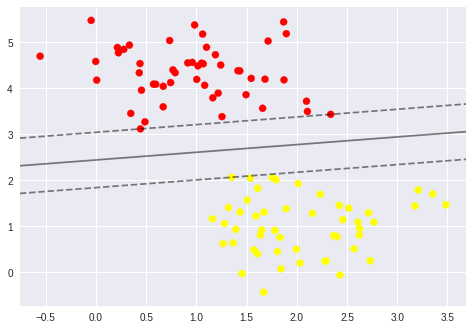

In [ ]:
def plot_svc_decision_function(model, ax= None, plot_support=True):


  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors="k", levels = [-1, 0, 1], alpha = .5, linestyles=['--','-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
    model.support_vectors_[:,1],
    s=300, linewidth=1, facecolors='none');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/ml

/content/drive/MyDrive/ml


In [ ]:
%ls

 2147227_Knn_naive_kmean.ipynb   Folds5x2_pp.ods         Readme.txt
'23_July_22_lab2 (1).ipynb'      hcvdat0.csv             Readme.txt~
 23_July_22_lab2.ipynb          'Lab (2).ipynb'          reg.csv
 CCPP/                           processed_min_max.csv   supermarket.csv
 Folds5x2_pp.csv                 processed_scaler.csv


In [ ]:
df = pd.read_csv('supermarket.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


# convert catogorical to numerical, before converting it'll check if is non numerical 

In [ ]:

def convertCatNum(dataset):
  le = preprocessing.LabelEncoder()
  notCol = df._get_numeric_data().columns
  for col in df.columns:
    if col not in notCol:
      dataset[col]=le.fit_transform(dataset[col]) 
  return dataset

# remove null values and replace that with median values

In [ ]:
def remNull(dataset):
    
    imputer = SimpleImputer(missing_values=np.nan,strategy="median")
    imputer.fit(dataset.iloc[:,[4,5,6,10,13]])
    dataset.iloc[:,[4,5,6,10,13]]=imputer.transform(dataset.iloc[:,[4,5,6,10,13]])
    print("Checking null value:\n")
    print(dataset.isnull().sum())
    print("\n\n")
    return dataset

# normalise and split the dataset into train and test
# parameters: dataset, features in array
# return: x_train, x_test, y_train, y_test
**remember select the feature**

In [ ]:
def splitter(dataset, colsx, colsy):
  # X=dataset.iloc[:,2:].values
  # y=dataset.iloc[:,1].values
  X = dataset[[*colsx]].values
  y = dataset[[*colsy]].values
  SD=StandardScaler()
  X=SD.fit_transform(X)
  #y=np.column_stack(SD.fit_transform(y))
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
  return X_train, X_test, y_train, y_test

In [ ]:
# df = convertCatNum(df.copy(), 'Gender')
# df = convertCatNum(df.copy(), 'Branch')
# df = convertCatNum(df.copy(), 'City')
# df = convertCatNum(df.copy(), 'Customer type')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df = convertCatNum(df.copy())

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,814,0,2,0,0,3,74.69,7,26.1415,548.9715,26,146,2,522.83,4.761905,26.1415,9.1
1,142,2,1,1,0,0,15.28,5,3.8200,80.2200,87,23,0,76.40,4.761905,3.8200,9.6
2,653,0,2,1,1,4,46.33,7,16.2155,340.5255,81,155,1,324.31,4.761905,16.2155,7.4
3,18,0,2,0,1,3,58.22,8,23.2880,489.0480,19,485,2,465.76,4.761905,23.2880,8.4
4,339,0,2,1,1,5,86.31,7,30.2085,634.3785,57,29,2,604.17,4.761905,30.2085,5.3


In [ ]:
x_train, x_test, y_train, y_test = splitter(df.copy(), ['Product line', 'Branch'], ['Gender'])

In [ ]:

from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [ ]:
clf.predict([[4,0]])

[1]


In [ ]:
def plot_svc_decision_function_(model, ax= None, plot_support=True):


  if ax is None:
    ax = plt.gca()
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()

  x = np.linspace(xlim[0], xlim[1], 30)
  y = np.linspace(ylim[0], ylim[1], 30)
  Y, X = np.meshgrid(y, x)
  xy = np.vstack([X.ravel(), Y.ravel()]).T
  P = model.decision_function(xy).reshape(X.shape)

  ax.contour(X, Y, P, colors="k", levels = [-1, 0, 1], alpha = .5, linestyles=['--','-', '--'])

  if plot_support:
    ax.scatter(model.support_vectors_[:,0],
    model.support_vectors_[:,1],
    s=300, linewidth=1, facecolors='none');

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[3 0]
 [0 2]
 [4 0]
 ...
 [2 0]
 [4 0]
 [1 0]]


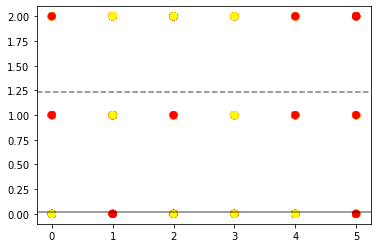

In [ ]:
x = df[['Product line', 'Branch']].values
y = df[['Gender']].values
plt.scatter(x[:,0], x[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
print(x)